In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # for image display
from google.colab import drive
from skimage import io
drive.mount('/content/gdrive')

Mounted at /content/gdrive


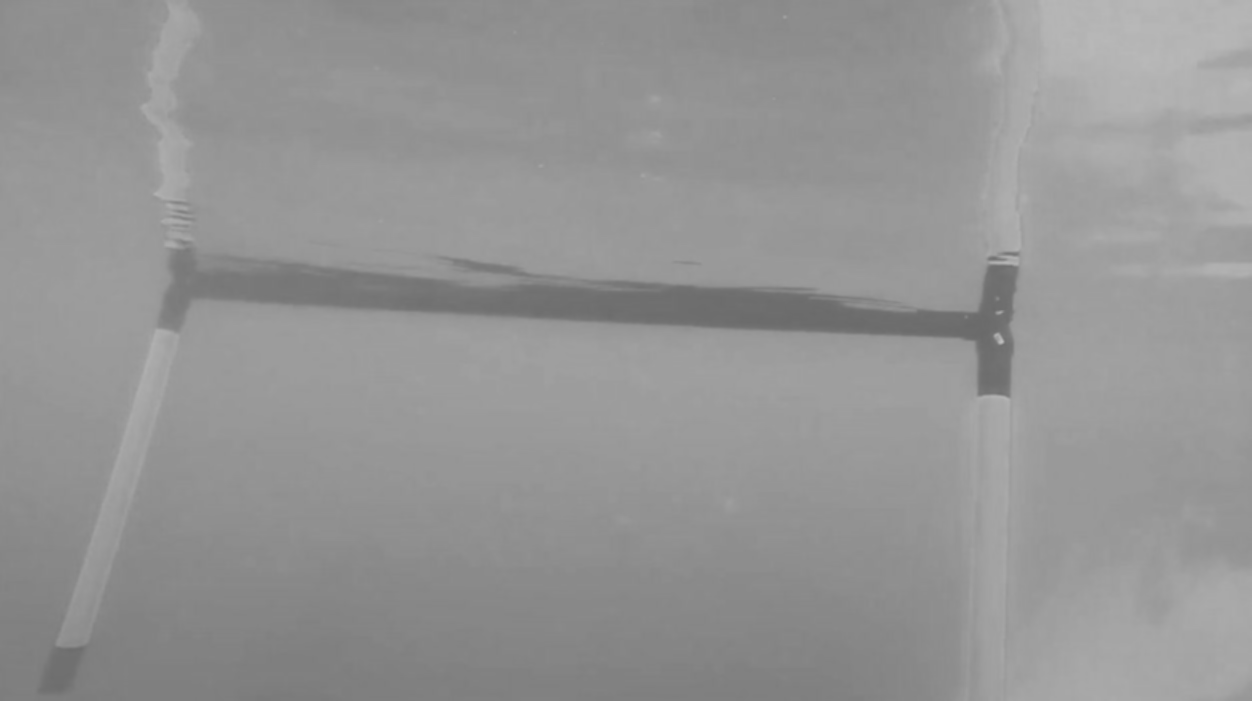

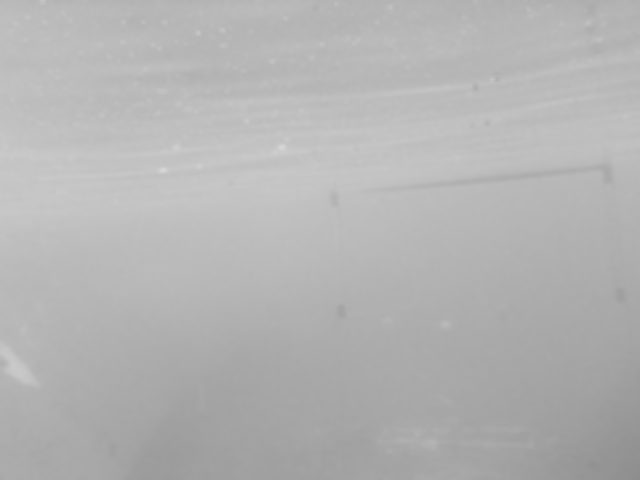

In [32]:
img = io.imread("/content/gdrive/MyDrive/1009.jpg")
img1 = io.imread("/content/gdrive/MyDrive/one.jpg")

#Convert image to gray just cause I can
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(gray_image,(3,3),cv2.BORDER_DEFAULT)
img_blur1 = cv2.GaussianBlur(gray_image1,(5,5),cv2.BORDER_DEFAULT)
cv2_imshow(img_blur)
cv2_imshow(img_blur1)

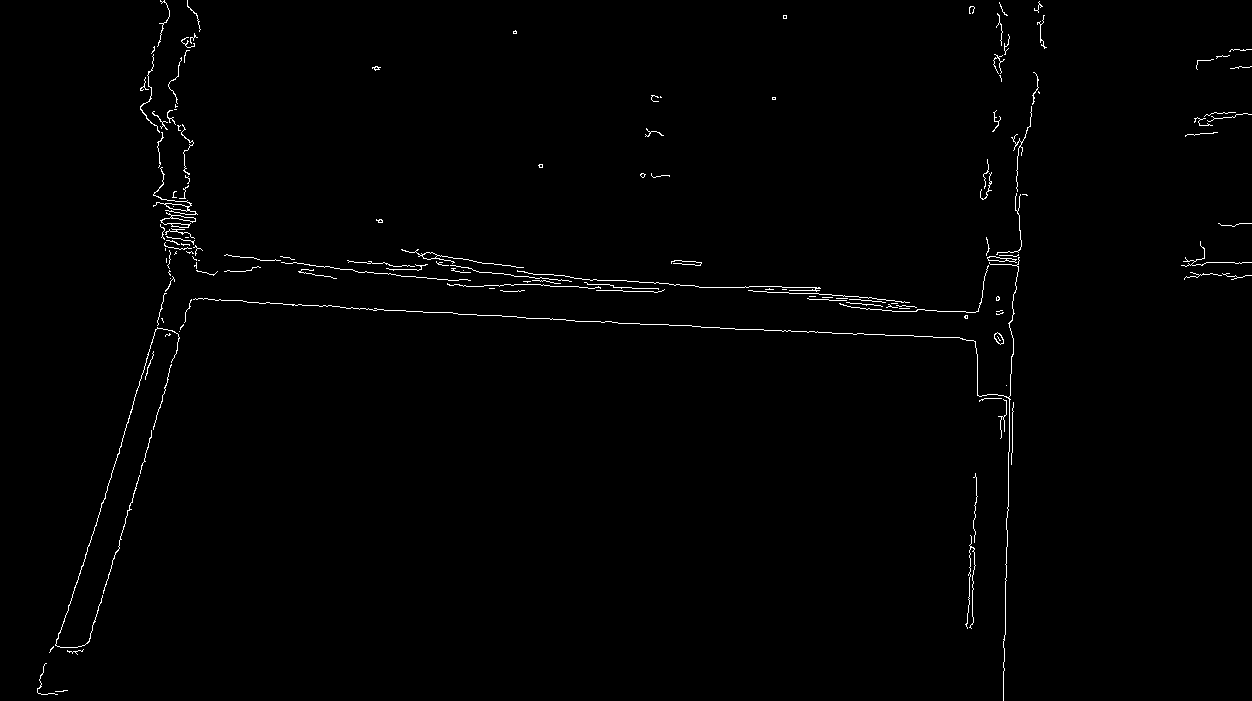

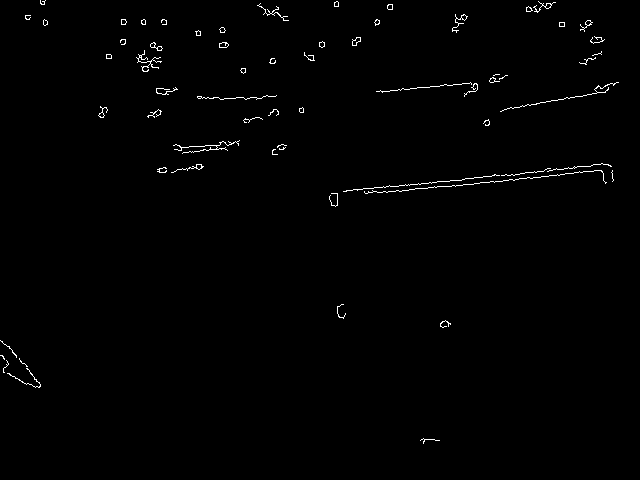

In [96]:
#get the edges of the gate
edges = cv2.Canny(img_blur, 0, 25)
edges1 = cv2.Canny(img_blur1, 0, 25)
cv2_imshow(edges)
cv2_imshow(edges1)

[[10, 242], [7, 315], [8, 327], [9, 365], [6, 414], [3, 562], [1, 596], [2, 667], [4, 1991], [5, 2286]]
Horizontal coordinates
172.24453915823122 966.0583623693379
height 306.6115485564304


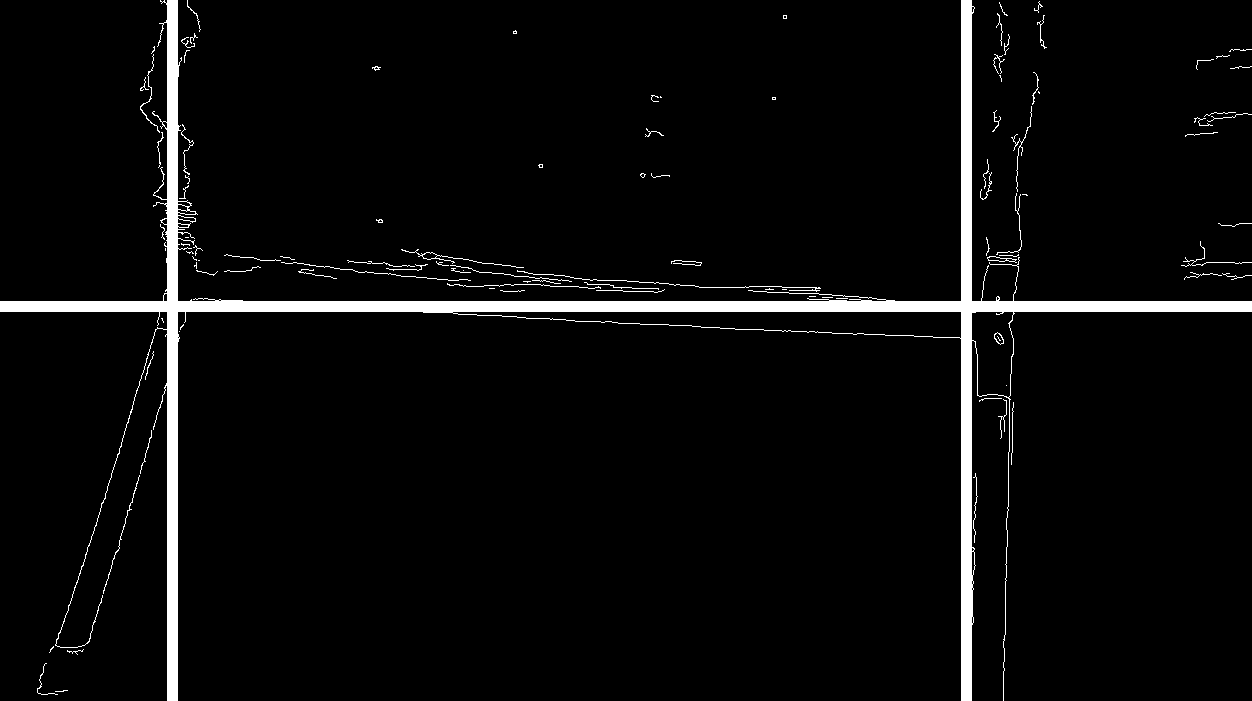

In [97]:
# split the image into 10 horizontal zone
# average the points in the zone where the points are top 2 most
edgesforLine = edges.copy()
indices = np.where(edgesforLine != [0])
height, width = edgesforLine.shape
countW = [[1,0],[2,0],[3,0],[4,0],[5,0],[6,0],[7,0],[8,0],[9,0],[10,0]]
countH = [[1,0],[2,0],[3,0],[4,0],[5,0],[6,0],[7,0],[8,0],[9,0],[10,0]]
n1 = width/10
n2 = height/10
for i in range (0,len(indices[0])):
  index1 = int(indices[1][i]/n1)
  index0 = int(indices[0][i]/n2)
  countW[index1][1]+=1
  countH[index0][1]+=1

# sort the count
def Sort(sub_li):
  return(sorted(sub_li, key = lambda x: x[1])) 
countW = Sort(countW)
countH = Sort(countH)
print(countH)
#avergae the points in the zone
Line1 = 0
Line2 = 0
HeightLine = 0
Lcount = 0
Rcount = 0
Hcount = 0
for i in range (0,len(indices[0])):
  index1 = int(indices[1][i]/n1)
  index0 = int(indices[0][i]/n2)
  if (index0 == countH[9][0]-1):
    HeightLine+=indices[0][i]
    Hcount+=1
  if (index1 == countW[9][0]-1):
    Line1+=indices[1][i]
    Rcount+=1
  elif (index1 == countW[8][0]-1):
    Line2+=indices[1][i]
    Lcount+=1
Line1 = Line1/Rcount
Line2 = Line2/Lcount
HeightLine = HeightLine/Hcount
print("Horizontal coordinates")
print(Line1,Line2)
print("height",HeightLine)
#draw the line
gate1 = cv2.line(edgesforLine,(int(Line1),0),(int(Line1),height),(255, 255, 0),9)
gate2 = cv2.line(edgesforLine,(int(Line2),0),(int(Line2),height),(255, 255, 0),9)
Hgate = cv2.line(edgesforLine,(0,int(HeightLine)),(width,int(HeightLine)),(255, 255, 0),9)
cv2_imshow(Hgate)


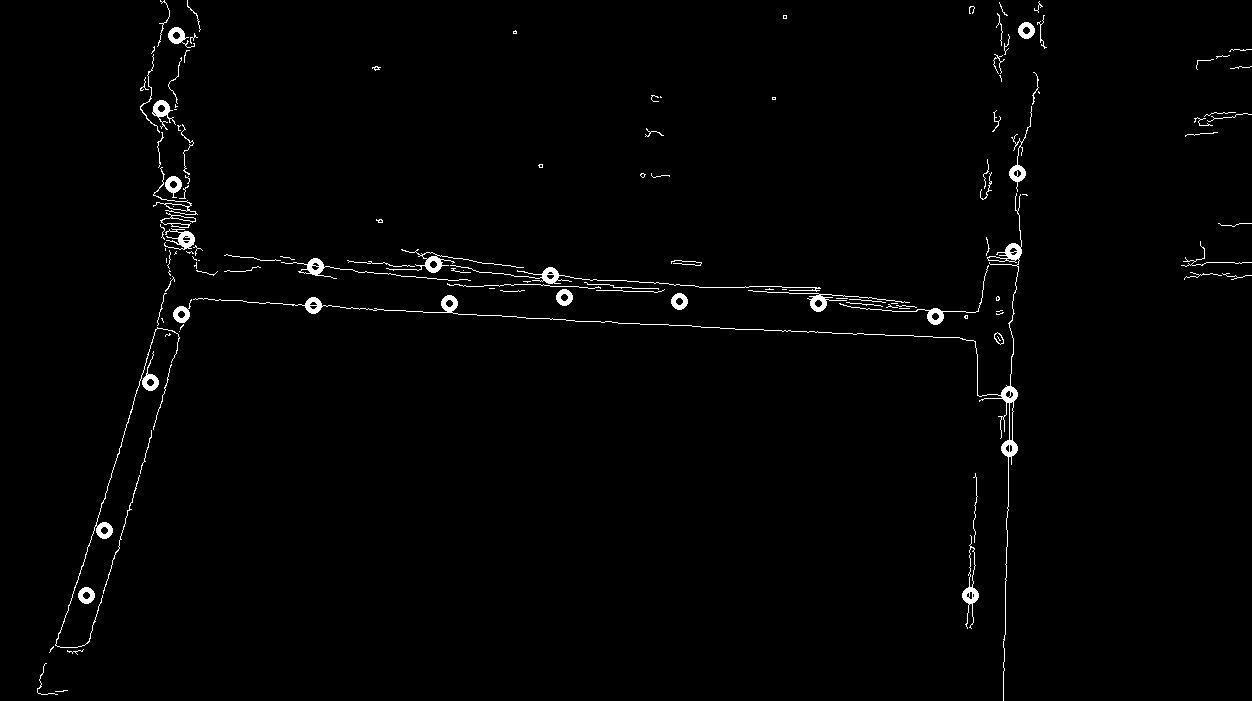

[[  0. 226.  10.  11.  11.   0.  12. 110. 126.  90.]
 [  0. 293.   0.   0.   0.  56.  10.  53. 101. 154.]
 [  0. 302.   0.   0.  13.  35.   0.  88. 124.   0.]
 [  0. 520. 243. 457. 214.  65.   0.  96. 152. 244.]
 [  0. 231. 129. 190. 356. 328. 542. 421.  89.   0.]
 [  0. 185.   0.   0.   0.   0.   0. 102. 127.   0.]
 [ 66.  86.   0.   0.   0.   0.   0.  38. 125.   0.]
 [125.  34.   0.   0.   0.   0.   0.  98.  70.   0.]
 [153.   0.   0.   0.   0.   0.   0. 142.  70.   0.]
 [171.   0.   0.   0.   0.   0.   0.   0.  71.   0.]]


In [98]:
#split the image into grids and compute the average coordinates
#where the points in the grid is more than threshold 
indices = np.where(edges != [0])
height, width = edges.shape
array = np.zeros((10,10))
n1 = width/10
n2 = height/10
for i in range (0,len(indices[0])):
  indexX = int(indices[1][i]/n1)
  indexY = int(indices[0][i]/n2)
  array[indexY][indexX]+=1

Xvalue = np.zeros((10,10))
Yvalue = np.zeros((10,10))
counts = np.zeros((10,10))
for i in range (0,len(indices[0])):
  indexX = int(indices[1][i]/n1)
  indexY = int(indices[0][i]/n2)
  if array[indexY][indexX]>120:
    Xvalue[indexY][indexX]+=indices[1][i]
    Yvalue[indexY][indexX]+=indices[0][i]
    counts[indexY][indexX]+=1
#image = cv2.circle(image, center, radius, color, thickness)
image = edges
for i in range(0,9):
  for j in range(0,9):
    if array[i][j]>120:   #threshold
      Xtemp = int(Xvalue[i][j]/counts[i][j])
      Ytemp = int(Yvalue[i][j]/counts[i][j])
      image = cv2.circle(image, (Xtemp,Ytemp), 6, (255,255,0), 3)

cv2_imshow(image)
print(array)
